## Examination of the Climate datasets

### 1. Import libraries and load datasets to pandas data frame

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.colors as mcolors

In [112]:
tempCountry = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
tempCity = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv')
tempGlobal = pd.read_csv('data/GlobalTemperatures.csv')

### 2. Exploration of columns and missing values for all datasets 

In [12]:
print(tempCountry.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None


In [13]:
print(tempCity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB
None


In [14]:
print(tempGlobal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB
None


### 3. Conclusion: Overview of Datasets and Their Columns

In this research, three different datasets were used to analyze global temperature patterns:

1. **GlobalLandTemperaturesByCountry.csv**  
   **Columns:** `AverageTemperature`, `AverageTemperatureUncertainty`, `Country`

2. **GlobalLandTemperaturesByMajorCity.csv**  
   **Columns:** `dt`, `AverageTemperature`, `AverageTemperatureUncertainty`, `City`, `Country`, `Latitude`, `Longitude`

3. **GlobalTemperatures.csv**  
   **Columns:**  
   `dt`, `LandAverageTemperature`, `LandAverageTemperatureUncertainty`,  
   `LandMaxTemperature`, `LandMaxTemperatureUncertainty`,  
   `LandMinTemperature`, `LandMinTemperatureUncertainty`,  
   `LandAndOceanAverageTemperature`, `LandAndOceanAverageTemperatureUncertainty`

---

#### Missing Values Analysis

- Both **GlobalLandTemperaturesByCountry** and **GlobalLandTemperaturesByMajorCity** datasets contain relatively few missing values compared to their total size.  
- However, the **GlobalTemperatures** dataset shows a noticeable amount of missing data. Specifically, for columns **3–8**, more than **1,000 rows out of 3,192** are missing.  
- This pattern likely occurs because data collection for these temperature measures (such as maximum and minimum land temperatures) began **only after the year 1850**, leading to gaps in earlier records.


In [ ]:
# This code was written with the aid of ChatGPT;
# Find out that Latitude/Longitude are writen in format like: "5.63N,3.23W", but I need a flot
# Promped to frite a function to convert to float format: Oct. 2025
def convert_lat_long(coord):
    """
    Convert coordinates like '5.63N', '3.23W' to numeric floats.
    """
    value = float(coord[:-1])   
    direction = coord[-1]       
    
    if direction in ['S', 'W']:
        value = -value
    return value

tempCity['Latitude'] = tempCity['Latitude'].apply(convert_lat_long)
tempCity['Longitude'] = tempCity['Longitude'].apply(convert_lat_long)

In [17]:
tempCity['dt'] = pd.to_datetime(tempCity['dt'], errors='coerce')
tempCity['year'] = tempCity['dt'].dt.year
tempCity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


Explore how temperature changed over years: 

In [18]:
yearly_temp_city = (
    tempCity.groupby(['City', 'year'], as_index=False)['AverageTemperature']
    .mean()
    .rename(columns={'AverageTemperature': 'YearlyAverageTemperature'})
)
yearly_temp=yearly_temp_city.dropna()
city_meta = tempCity[['City', 'Country', 'Latitude', 'Longitude']]
yearly_temp_city = yearly_temp_city.merge(city_meta, on='City', how='left')

yearly_temp_city.head()

,City,year,YearlyAverageTemperature,Country,Latitude,Longitude
0,Abidjan,1849,25.582583,Côte D'Ivoire,5.63,-3.23
1,Abidjan,1849,25.582583,Côte D'Ivoire,5.63,-3.23
2,Abidjan,1849,25.582583,Côte D'Ivoire,5.63,-3.23
3,Abidjan,1849,25.582583,Côte D'Ivoire,5.63,-3.23
4,Abidjan,1849,25.582583,Côte D'Ivoire,5.63,-3.23


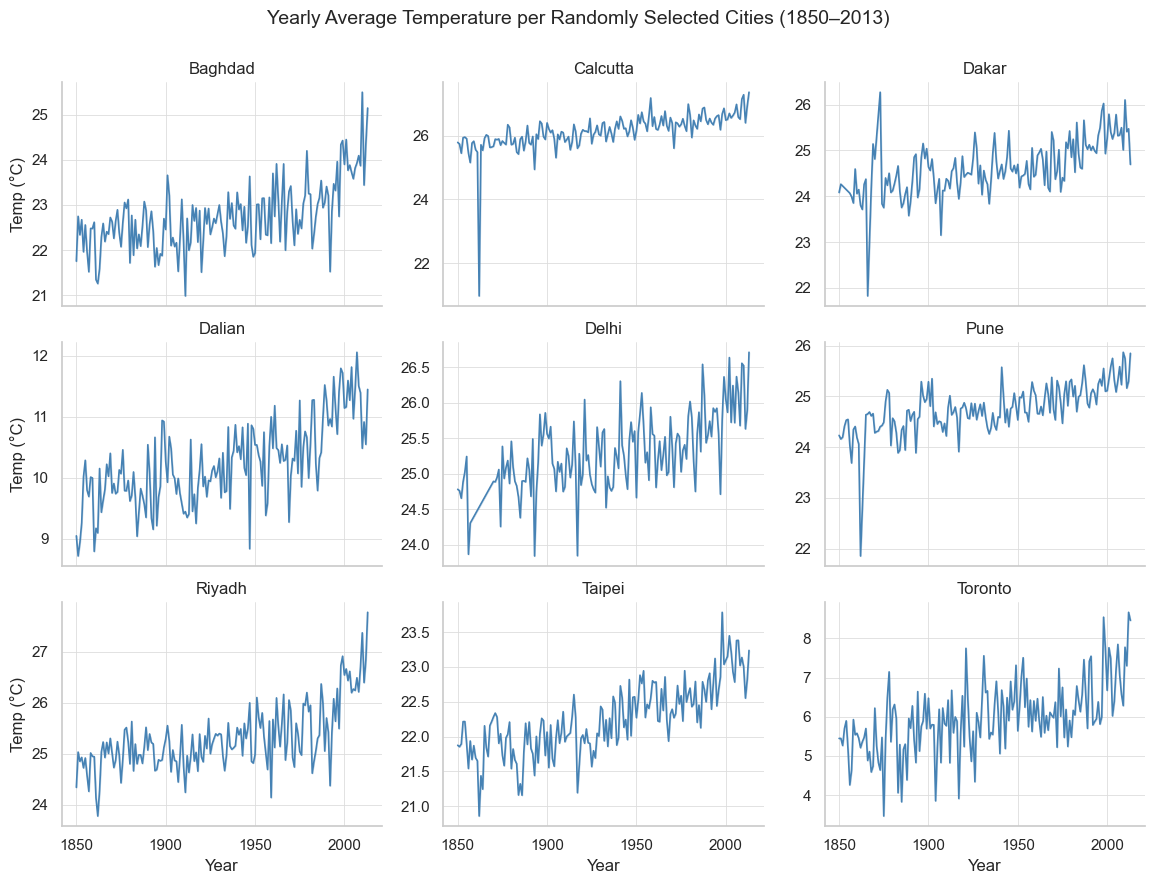

In [87]:
# Plot random 9 city to discover general temperature trend  

random_cities = np.random.choice(yearly_temp_city["City"].unique(), size=9, replace=False)

subset = yearly_temp_city[yearly_temp_city["City"].isin(random_cities)]

g = sns.FacetGrid(
    subset,
    col="City",
    col_wrap=3,           
    height=3,
    sharey=False,
    aspect=1.3
)

g.map_dataframe(
    sns.lineplot,
    x="year",
    y="YearlyAverageTemperature",
    color="steelblue",
    linewidth=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Temp (°C)")  
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Yearly Average Temperature per Randomly Selected Cities (1850–2013)", fontsize=14)

plt.show()

It seems like a temperature race for randomly chosen cities. However, it varies from year to year and is hard to find a pattern. So, let's find average for each decade from 1850 to 2010: 

In [88]:
yearly_temp_city['decade'] = (yearly_temp_city['year'] // 10) * 10
yearly_temp_city.head()

,City,year,YearlyAverageTemperature,Country,Latitude,Longitude,decade
1977,Abidjan,1850,25.51825,Côte D'Ivoire,5.63,-3.23,1850
1978,Abidjan,1850,25.51825,Côte D'Ivoire,5.63,-3.23,1850
1979,Abidjan,1850,25.51825,Côte D'Ivoire,5.63,-3.23,1850
1980,Abidjan,1850,25.51825,Côte D'Ivoire,5.63,-3.23,1850
1981,Abidjan,1850,25.51825,Côte D'Ivoire,5.63,-3.23,1850


In [ ]:
decade_temp = (
    yearly_temp_city[yearly_temp_city['year'].between(1850, 2013)]
    .groupby(['City', 'Country', 'Latitude', 'Longitude', 'decade'], as_index=False)['YearlyAverageTemperature']
    .mean()
    .rename(columns={'YearlyAverageTemperature': 'DecadeAverageTemperature'})
)
decade_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      1697 non-null   object 
 1   Country                   1697 non-null   object 
 2   Latitude                  1697 non-null   float64
 3   Longitude                 1697 non-null   float64
 4   decade                    1697 non-null   int32  
 5   DecadeAverageTemperature  1689 non-null   float64
dtypes: float64(3), int32(1), object(2)
memory usage: 73.0+ KB


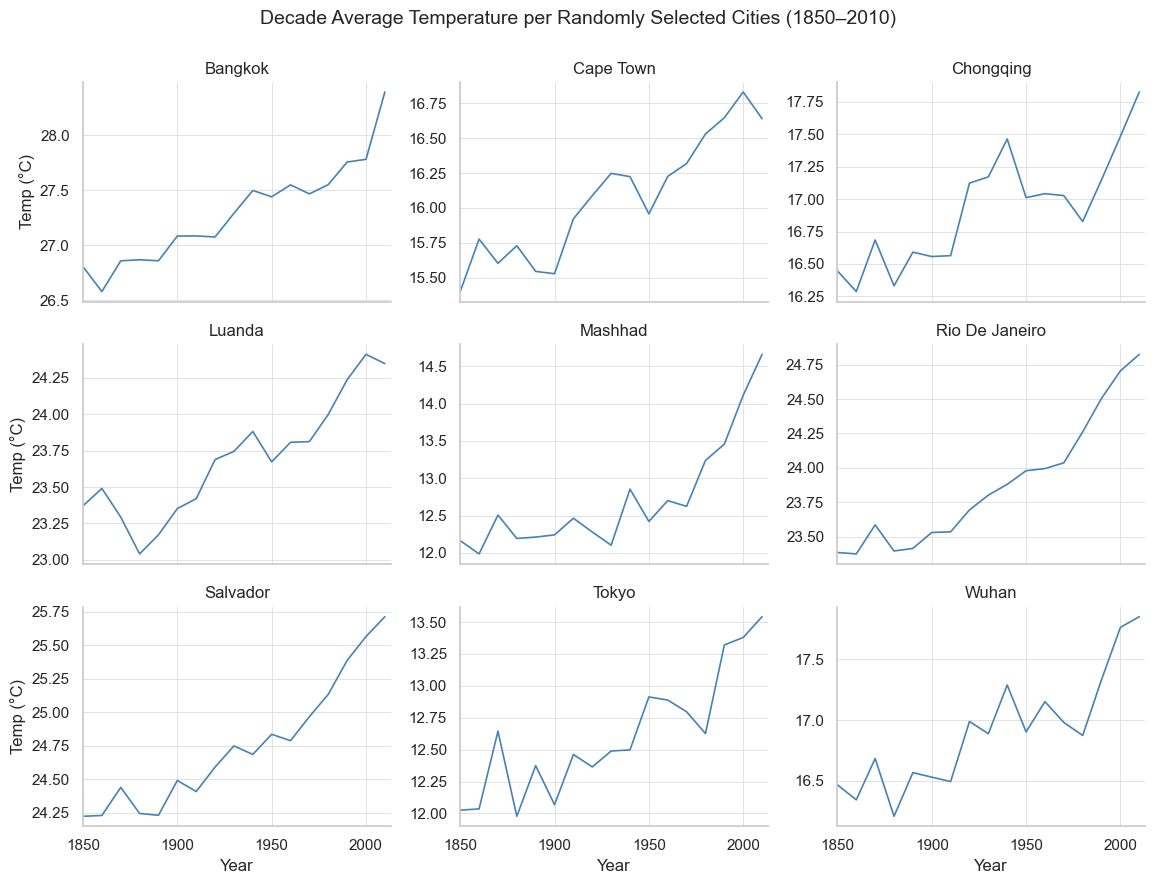

In [90]:
random_cities = np.random.choice(decade_temp["City"].unique(), size=9, replace=False)

subset = decade_temp[decade_temp["City"].isin(random_cities)]

g = sns.FacetGrid(
    subset,
    col="City",
    col_wrap=3,           
    height=3,
    sharey=False,
    aspect=1.3
)

g.map_dataframe(
    sns.lineplot,
    x="decade",
    y="DecadeAverageTemperature",
    color="steelblue",
    linewidth=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Temp (°C)")
g.set(xlim=(1850, 2013))    
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Decade Average Temperature per Randomly Selected Cities (1850–2010)", fontsize=14)

plt.show()

Now that the temperature change line has become smooth, the increase in temperatures is clearly visible.
The next steps is to compare how the temperature changed for each city from the decade 1850-1860 to 2000-2010. 

In [105]:
df_pivot = (
    decade_temp.pivot_table(
        index='City',
        columns='decade',
        values='DecadeAverageTemperature'
    )
    .reset_index()
)

df_pivot['ChangeTemp'] = df_pivot[2010] - df_pivot[1850]

df_pivot = df_pivot[['City', 'ChangeTemp']]

city_meta = decade_temp[['City', 'Country', 'Latitude', 'Longitude']].drop_duplicates('City')
df_pivot = df_pivot.merge(city_meta, on='City', how='left')
df_pivot = df_pivot.dropna()
df_pivot.head()

,City,ChangeTemp,Country,Latitude,Longitude
0,Abidjan,1.440346,Côte D'Ivoire,5.63,-3.23
1,Addis Abeba,1.829337,Ethiopia,8.84,38.11
2,Ahmadabad,1.455439,India,23.31,72.52
3,Aleppo,1.977444,Syria,36.17,37.79
4,Alexandria,1.725367,Egypt,31.35,30.16


/* -----
The code below was written with the aid of ChatGPT;
I wanted to display cities' temperature change on the map and prompted 'Using the leaflet python library, help to plot lat/lon points with cities on the map. Make the dot bigger. Also display ChangeTemp for each city. On clicking the city, it should be pop-up that show the city name. [Then I corrected the code where it was needed after that, added a gradient to display colors in a way from cooler temperature change to hotter]
The generated text helped me write the following code:
accessed: Oct. 2025
 -------- */

## First fanal visualization

In [ ]:
min_temp = df_pivot['ChangeTemp'].min()
max_temp = df_pivot['ChangeTemp'].max()
center = df_pivot['ChangeTemp'].mean() * 0.6

norm = mcolors.TwoSlopeNorm(vmin=min_temp, vcenter=center, vmax=max_temp)
cmap = mpl.pyplot.get_cmap('RdYlBu_r')

# Create map
m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

for _, row in df_pivot.iterrows():
    # Normalize value and get color from colormap
    color_hex = mcolors.to_hex(cmap(norm(row['ChangeTemp'])))

    # HTML label (temperature difference)
    html_label = f"""
    <div style="text-align:center;width:60px;
                font-size:12px;font-family:Arial;
                border:1px solid #999;background-color:white;
                border-radius:5px;padding:2px;">
        <b style="color:{color_hex};">{row['ChangeTemp']:+.2f}°C</b>
    </div>
    """

    # Popup for city info
    popup_html = f"""
    <div style="font-size:13px;">
        <b>{row['City']}</b>, {row['Country']}<br>
        ΔTemp: <b>{row['ChangeTemp']:+.2f}°C</b>
    </div>
    """

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=10,
        color=color_hex,
        fill=True,
        fill_color=color_hex,
        fill_opacity=0.8,
        popup=folium.Popup(popup_html, max_width=220)
    ).add_to(m)

    folium.map.Marker(
        [row['Latitude'] + 1, row['Longitude'] + 1],
        icon=folium.DivIcon(html=html_label)
    ).add_to(m)

legend_html = f"""
<div style="
position: fixed; top: 15px; left: 55px; width: 230px; height: 60px;
background-color: rgba(255,255,255,0.9); border:2px solid grey;
z-index:9999; font-size:13px; text-align:center;
border-radius:5px; padding:4px;">
<b>Δ Temperature (1850 → 2010)</b><br>
<span style="color:blue;">Colder</span>
<span style="background: linear-gradient(to right, blue, red);
display:inline-block;width:90px;height:10px;margin:0 5px;"></span>
<span style="color:red;">Warmer</span><br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

m

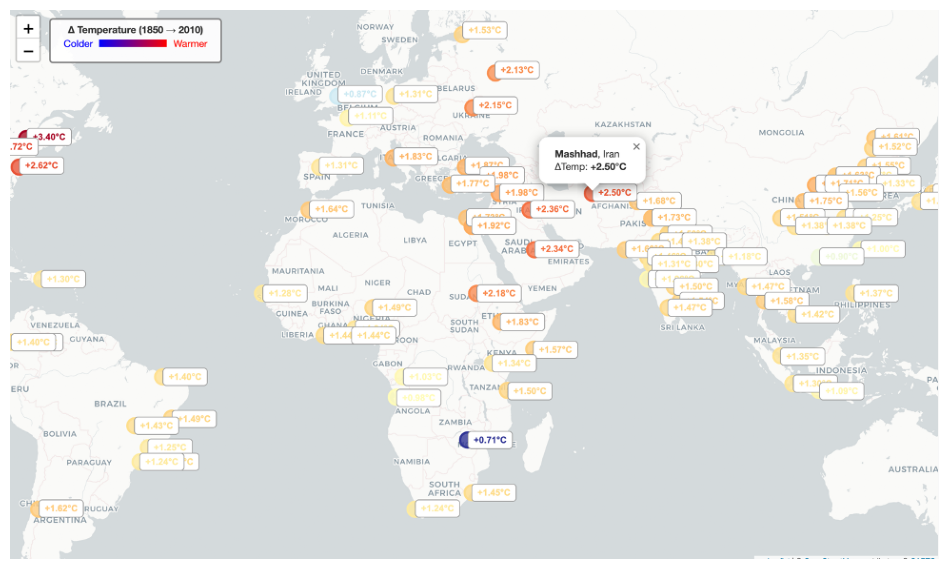

In [121]:
# in case if map will not loaded, adding screenshot:
import matplotlib.image as mpimg

img = mpimg.imread("Picture1.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off") 
plt.show()

## 🌍 Climate Change Pattern Analysis (from 1850 to 2010)

The map shows that temperature change between the decades **1850–1860** and **2000–2010** is highly uneven across cities, ranging from **+0.7 °C to +3.4 °C**.  
The biggest warming is observed in **northern mid-latitude regions**, particularly in **Canada (Montreal, Toronto)**, the **northeastern United States (New York)**, **Eastern Europe**, and **East Asia**.

The visualization reveals a consistent pattern of warming concentrated in the Northern Hemisphere, with average temperature increases between **+1 °C and +3 °C** across **Europe, North America, and Middle East**.  
In contrast, other regions show smaller changes around **+1-1.5 °C**.

To discover more about why temperature change was uneven across the world’s cities, I looked into a study by Byrne and O’Gorman (2013) published in the *Journal of Climate*.  
Source: https://journals.ametsoc.org/view/journals/clim/26/12/jcli-d-12-00262.1.xml

The authors explain that land areas warm faster than oceans because land holds less moisture and cannot store heat as efficiently as water. This difference, known as the land–ocean warming contrast, means that cities and inland regions, those far from large bodies of water, experience stronger temperature increases.  

Even though cities like Toronto and New York City are located near large bodies of water, their regional climates are still affected by the continental warming trend of North America. Their warming is caused by the surrounding land effects, urbanization, and atmospheric circulation that carries heat inland.

Overall, this explains why northern cities in North America, East Asia, and Eastern Europe show some of the strongest temperature increases between 1850 and 2010.  
Their locations within large land-dominated regions make them especially sensitive to long-term global temperature rise.


### Exploring Global Temperature Dataset

After determining the pattern of warming in cities and investigating the causes of this, it was decided to continue researching global trends in global temperature change using global temperature data **GlobalTemperatures.csv**.  

In [41]:
tempGlobal.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
tempGlobal = tempGlobal.dropna(subset=['LandAverageTemperature'])
tempGlobal.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
import calendar
tempGlobal['dt'] = pd.to_datetime(tempGlobal['dt'], errors='coerce')
tempGlobal['year'] = tempGlobal['dt'].dt.year
tempGlobal['month'] = tempGlobal['dt'].dt.month
tempGlobal['month_name'] = tempGlobal['month'].apply(lambda x: calendar.month_abbr[x])

In [115]:
tempGlobal.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month,month_name
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,Jan
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,Feb
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,Mar
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,Apr
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,May


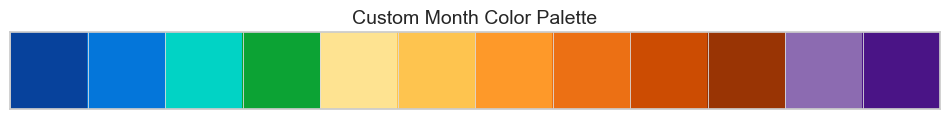

In [116]:
month_palette = sns.color_palette([
    "#07429C",  # Jan 
    "#0476DA",  # Feb 
    "#01D3C5",  # Mar 
    "#0CA334",  # Apr 
    "#FEE391",  # May 
    "#FEC44F",  # Jun 
    "#FE9929",  # Jul 
    "#EC7014",  # Aug 
    "#CC4C02",  # Sep 
    "#993404",  # Oct 
    "#8C6BB1",  # Nov 
    "#4A1486"   # Dec 
])

month_palette = sns.color_palette(month_palette, n_colors=12)

sns.palplot(month_palette)
plt.title("Custom Month Color Palette", fontsize=14)
plt.show()

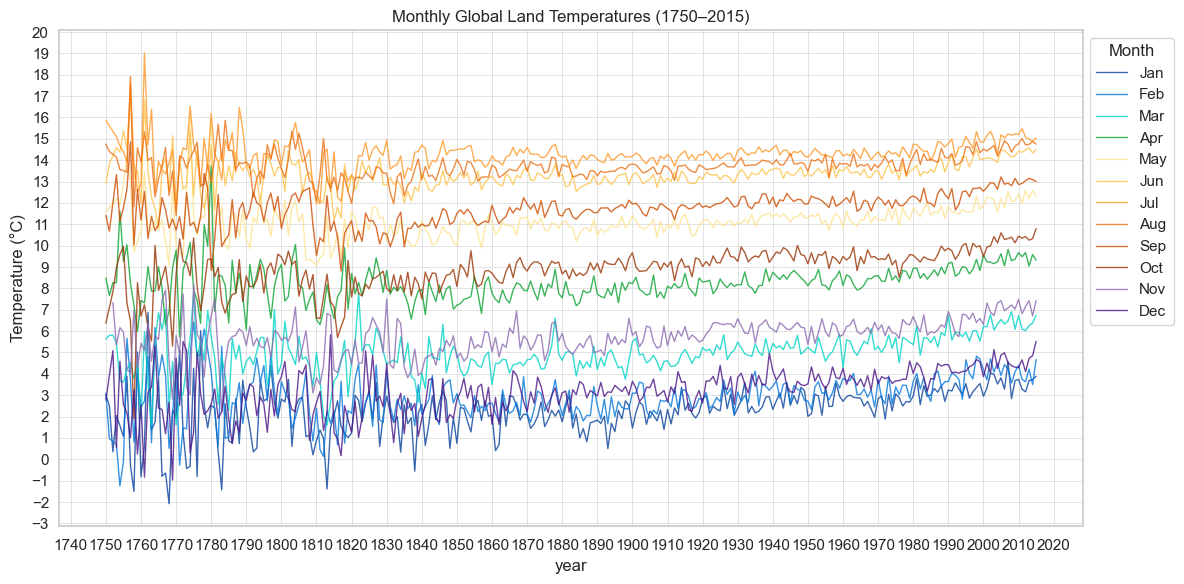

In [117]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=tempGlobal,
    x="year", y="LandAverageTemperature",
    color="green", 
    hue="month_name",
    hue_order=list(calendar.month_abbr)[1:],
    palette=month_palette,
    alpha=0.8,
    linewidth=1
)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1)) 
ax.tick_params(axis="y", which="both", direction="out", length=4, color="#888")

ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) 
ax.tick_params(axis="y", which="both", direction="out", length=4, color="#888")

plt.title("Monthly Global Land Temperatures (1750–2015)")
plt.ylabel("Temperature (°C)")
plt.legend(title="Month", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [118]:
tempGlobal['decade'] = (tempGlobal['year'] // 10) * 10
decade_avg = (
    tempGlobal
    .groupby(['decade', 'month_name'], as_index=False)['LandAverageTemperature']
    .mean()
)
decade_avg.head()

,decade,month_name,LandAverageTemperature
0,1750,Apr,8.505100
1,1750,Aug,14.236222
2,1750,Dec,2.472222
3,1750,Feb,1.962444
4,1750,Jan,1.767900


## Second fanal visualization

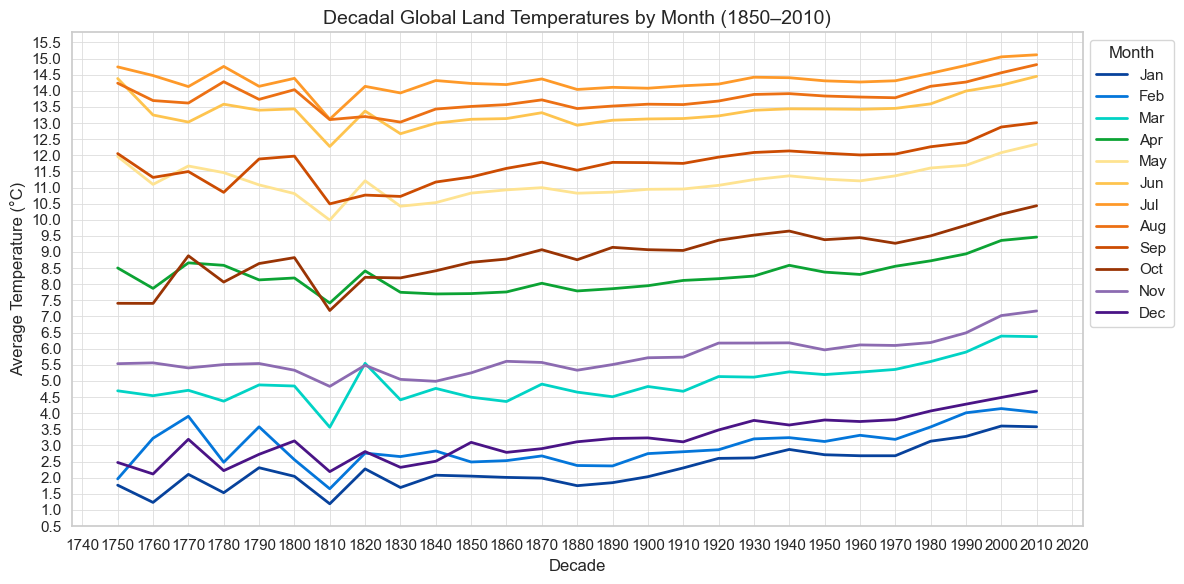

In [ ]:
plt.figure(figsize=(12, 6))

sns.set_theme(
    style="whitegrid", 
    rc={
        "grid.color": "#dddddd",     
        "grid.linewidth": 0.6,       
        "axes.edgecolor": "#cccccc", 
    }
)
sns.lineplot(
    data=decade_avg,
    x="decade",
    y="LandAverageTemperature",
    hue="month_name",
    hue_order=list(calendar.month_abbr)[1:],  # ensures order Jan–Dec
    palette=month_palette,
    linewidth=2
)

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
ax.tick_params(axis="y", which="both", direction="out", length=4, color="#888")

ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) 
ax.tick_params(axis="y", which="both", direction="out", length=4, color="#888")

plt.title("Decadal Global Land Temperatures by Month (1750–2010)", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average Temperature (°C)")
plt.legend(title="Month", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

## 🌡 Global Temperature Change Summary (1750 – 2010)

The global temperature change over years demonstrates notable year-to-year variability, especially during the winter months (January, February, December).  
When temperatures are aggregated by decade, the overall pattern becomes much clearer and smoother.  

Over the past 260 years (1750 – 2010), the data reveals a consistent long-term warming trend:

#### ☀️ Warmer Months (May – September)
- Show a gradual increase of about **+0.5 °C** from 1820 to around 1980.  
- After 1980, the warming rate accelerated, reaching nearly +1 °C above 19th-century averages.  


#### ❄️ Cooler Months (January – February – December)
- Display a more linear but stronger rise, with temperature increases of approximately +1.5 °C since 1820.  


While the annual temperatures fluctuate due to natural variability, the decadal trends reveal a clear and accelerating pattern of global warming, with stronger temperature anomalies emerging after the late 20th century.


## Report about process

During the climate analyze was chosen, two datasets were chosen: global land temperatures by major city and global temperature change. The idea was to discover how the average temperature changes over the years and what parts of the world are more exposed to climate change.

At first, the cities dataset was explored. To see the overall trends in temperature changes in cities over time, the monthly temperatures were averaged to show a smoother change over the years. 9 random cities were plotted on the line plots. The overall trend shows that temperatures are increasing in cities over the years. However, the change is not linear. The average annual temperature changes from year to year, showing an increase in one year and a decrease in another.

To see a smoother picture, the annual temperature was averaged into temperatures over decadal periods (every 10 years), starting from 1850 and ending in 2010. The result shows smoother lines and a clearer trend of decreasing temperatures in cities.

Moving farther was chosen to compare the temperature change of the first recorded decade, 1850-1860, with the latest recorded 2000-2010. Having latitude and longitude coordinates in the dataset, the average of the temperature change was calculated and plotted on the map. The results reveal a picture that the average temperature change is not uniformly distributed over the cities. The map shows that temperature change ranges from +0.7 °C to +3.4 °C. The biggest warming is observed in Canada (Montreal, Toronto, +3.4 °C), the northeastern United States (New York, +2.6 °C), Eastern Europe (+2 °C), and East Asia (+2.4 °C).

When studying the phenomenon of uneven distribution of temperature changes, it was found that the temperature changes more where there are large areas of land, and where wind masses come from large areas of land. Also, the industrialization of cities is one of the factors of warming in these places.

After determining the pattern of warming in cities and investigating the causes of this, it was decided to continue researching global trends in global temperature change using global temperature data.

The global temperature change over the year for each month was plotted on the line plot. The investigation shows that in the period from 1750 to 1840 yearly global temperature over month was large deviated. It might indicate uncertainty in temperature record since the field corresponding to land average temperature uncertainty is large at this period comparing to latest years. 

The global temperature change over the year for each month was plotted on the line plot. The investigation shows that in the period from 1750 to 1840 yearly global temperature over the month was large deviated. It might indicate uncertainty in the temperature record since the field corresponding to land average temperature uncertainty is large during this period compared to the latest years. Similar to the cities dataset, it is hard to describe the change over time using yearly changes since the temperature average is increasing and decreasing over the years. Therefore, another plot was made for the change in temperature over the decade starting from 1750 and ending in 2010. 

Since the average temperature between 1750 and 1820 is less certain, the following description of temperature trends will be based on data from 1820 to 2010. Overall, the global temperature during warmer months (from May to September) increases by about +0.5 °C from 1820 to around 1980. After 1980, the warming rate accelerated, reaching nearly +1 °C above 19th-century averages.  Cooler months (January, February, December) display a more linear but stronger rise, with temperature increases of approximately +1.5 °C since 1820. While the annual temperatures fluctuate due to natural variability, the decadal trends reveal a clear and accelerating pattern of global warming, with stronger temperature anomalies emerging after the late 20th century. 